In [1]:
import scanpy as sc
import pandas as pd
from scipy.io import mmread

In [2]:
# Read sparse matrix (transpose because mtx is transposed)
counts = mmread('/home/gdallagl/myworkdir/XDP/data/XDP/diseased/recon_241105/seurat_export/counts_matrix_recon_241105.mtx').T.tocsr()

In [3]:
# Read annotations
genes = pd.read_csv('/home/gdallagl/myworkdir/XDP/data/XDP/diseased/recon_241105/seurat_export/genes_recon_241105.csv')
barcodes = pd.read_csv('/home/gdallagl/myworkdir/XDP/data/XDP/diseased/recon_241105/seurat_export/barcodes_recon_241105.csv')
metadata = pd.read_csv('/home/gdallagl/myworkdir/XDP/data/XDP/diseased/recon_241105/seurat_export/metadata_recon_241105.csv', index_col=0)

metadata.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cb', 'cb_index', 'logumi',
       'percent.mt', 'RNA_snn_res.0.8', 'seurat_clusters', 'x_um', 'y_um',
       'library', 'donor_id', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3',
       'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6',
       'RNA_snn_res.0.7', 'RNA_snn_res.0.9', 'RNA_snn_res.1',
       'crude_cell_class', 'cell_class_try2', 'cell_class_try2_combine',
       'RNA_snn_res.0.01', 'RNA_snn_res.0.05', 'RNA_snn_res.0.1',
       'RNA_snn_res.0.15', 'subclass', 'final_cell_class',
       'reclustered_patch_matrix_exotic', 'cell_class'],
      dtype='object')

In [4]:
# Create AnnData
adata = sc.AnnData(X=counts)
adata.var_names = genes['gene'].values
adata.obs_names = barcodes['barcode'].values
adata.obs = metadata

# Process obs
adata.obs = adata.obs[[
    'nCount_RNA', 'nFeature_RNA', 'logumi', 'percent.mt', 'seurat_clusters', 'x_um', 'y_um', 'library', 
    'cell_class', 'subclass', 'reclustered_patch_matrix_exotic'
]]

adata.obs.rename(columns={
    'nCount_RNA': 'total_counts',
    'nFeature_RNA': 'n_genes',
    'percent.mt': 'pct_counts_mt',
    'orig.ident': 'sample',
    'x_um': 'x',
    'y_um': 'y',
    'subclass': 'cell_subclass'
    # Add more as needed
}, inplace=True)

# add var
adata.var['gene_symbol'] = adata.var.index

print(adata)
display(adata.obs)
display(adata.var)

AnnData object with n_obs × n_vars = 129301 × 38606
    obs: 'total_counts', 'n_genes', 'logumi', 'pct_counts_mt', 'seurat_clusters', 'x', 'y', 'library', 'cell_class', 'cell_subclass', 'reclustered_patch_matrix_exotic'
    var: 'gene_symbol'


,total_counts,n_genes,logumi,pct_counts_mt,seurat_clusters,x,y,library,cell_class,cell_subclass,reclustered_patch_matrix_exotic
RECON_rxn1__AAACCAGCAATGCGGG-1,22606,5374,4.354243,0.185791,6,3196.657380,10435.337363,RECON_rxn1,neuron,D2_matrix,SPN_matrix
RECON_rxn1__AAACCATTCATGGACC-1,17421,5813,4.241098,0.453476,28,11946.064911,15601.603753,RECON_rxn1,neuron,interneuron_4,non_SPN
RECON_rxn1__AAACCATTCCATGGGT-1,27547,6692,4.440090,0.148837,15,NaN,NaN,RECON_rxn1,neuron,eSPN_D1,eSPN
RECON_rxn1__AAACCATTCCCTACCA-1,11514,4058,4.061264,0.243182,11,NaN,NaN,RECON_rxn1,neuron,D2_matrix,SPN_matrix
RECON_rxn1__AAACCATTCGCATCAA-1,50478,8394,4.703111,0.530924,25,15601.875356,15942.359802,RECON_rxn1,neuron,interneuron_1,non_SPN
...,...,...,...,...,...,...,...,...,...,...,...
RECON_rxn8__GTTGCGTAGAGGCCAA-1,4543,2510,3.657438,1.166630,16,11067.522331,876.735952,RECON_rxn8,endothelial,endothelial,endothelial
RECON_rxn8__GTTGCTTTCCCCATTG-1,1724,1150,3.236789,2.552204,20,9408.582546,10774.540729,RECON_rxn8,endothelial,endothelial,endothelial
RECON_rxn8__GTTGCTTTCCGCCGTT-1,13713,4719,4.137164,0.590680,16,12939.548983,17749.210304,RECON_rxn8,endothelial,endothelial,endothelial
RECON_rxn8__GTTGGTCAGGCATCGT-1,4515,2573,3.654754,1.173865,16,13743.409449,16390.131370,RECON_rxn8,endothelial,endothelial,endothelial


,gene_symbol
DDX11L2,DDX11L2
MIR1302-2HG,MIR1302-2HG
FAM138A,FAM138A
ENSG00000290826,ENSG00000290826
OR4F5,OR4F5
...,...
ENSG00000277836,ENSG00000277836
ENSG00000278633,ENSG00000278633
ENSG00000276017,ENSG00000276017
ENSG00000278817,ENSG00000278817


### Change gene names

In [5]:
# Load gene mapping
df_genes = pd.read_csv("/home/gdallagl/myworkdir/XDP/data/BioMart/ensamble-name_biomart.txt", sep="\t")
display(df_genes)

# Check for duplicates
print("Duplicate gene names in BioMart:")
print(df_genes['Gene name'].value_counts().head(10))

# ATTENTION: Keep only the first mapping for each gene name
print(f"\nOriginal BioMart entries: {len(df_genes)}")
df_genes = df_genes.drop_duplicates(subset='Gene name', keep='first')
print(f"After deduplication: {len(df_genes)}")

# Create a mask for genes NOT starting with "ENSG"
mask_not_ensembl = ~adata.var['gene_symbol'].str.startswith('ENSG', na=False)

print(f"Total genes: {len(adata.var)}")
print(f"Genes NOT starting with ENSG: {mask_not_ensembl.sum()}")
print(f"Genes already ENSG: {(~mask_not_ensembl).sum()}")

# IMPORTANT: Reset index before merge, then restore it
adata.var = adata.var.reset_index(drop=False)  # Keep the original index as a column

# Merge only for non-ENSG genes
adata.var = pd.merge(
    adata.var, 
    df_genes, 
    how="left", 
    left_on="gene_symbol", 
    right_on="Gene name"
)

print(f"After merge: {len(adata.var)} rows")  # Should be 38606

# Restore the index
adata.var = adata.var.set_index('index')  # or whatever the index column is named
adata.var.index.name = None

# For genes that already start with ENSG, use the original gene_symbol as the Ensembl ID
ensembl_col = "Gene stable ID"  # Adjust this to your actual column name

# Fill missing Ensembl IDs: if gene already starts with ENSG, use it
adata.var.loc[~mask_not_ensembl, ensembl_col] = adata.var.loc[~mask_not_ensembl, 'gene_symbol']

# Set index
adata.var.set_index(ensembl_col, inplace=True) # Set the 'gene_ids' column as the new index
adata.var.index.name = 'ensembl_id' #rename the index
adata.var = adata.var.drop(columns=["Gene name"])

display(adata.var)
print(f"Final shape: {adata.var.shape}")

,Gene stable ID,Gene name
0,ENSG00000210049,MT-TF
1,ENSG00000211459,MT-RNR1
2,ENSG00000210077,MT-TV
3,ENSG00000210082,MT-RNR2
4,ENSG00000209082,MT-TL1
...,...,...
86364,ENSG00000168710,AHCYL1
86365,ENSG00000081692,JMJD4
86366,ENSG00000157873,TNFRSF14
86367,ENSG00000132676,DAP3


Duplicate gene names in BioMart:
Gene name
Y_RNA          845
Metazoa_SRP    216
U6             117
LILRP2          72
U3              53
KIR3DL3         42
KIR2DL4         41
KIR3DL2         37
KIR3DP1         35
KIR2DL1         33
Name: count, dtype: int64

Original BioMart entries: 86369
After deduplication: 41452
Total genes: 38606
Genes NOT starting with ENSG: 25644
Genes already ENSG: 12962
After merge: 38606 rows


/home/gdallagl/.pyenv/versions/3.11.8/lib/python3.11/functools.py:909: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/home/gdallagl/.pyenv/versions/3.11.8/lib/python3.11/functools.py:909: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/home/gdallagl/.pyenv/versions/3.11.8/lib/python3.11/functools.py:909: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


,gene_symbol
ensembl_id,
ENSG00000236397,DDX11L2
ENSG00000243485,MIR1302-2HG
ENSG00000237613,FAM138A
ENSG00000290826,ENSG00000290826
ENSG00000186092,OR4F5
...,...
ENSG00000277836,ENSG00000277836
ENSG00000278633,ENSG00000278633
ENSG00000276017,ENSG00000276017


Final shape: (38606, 1)


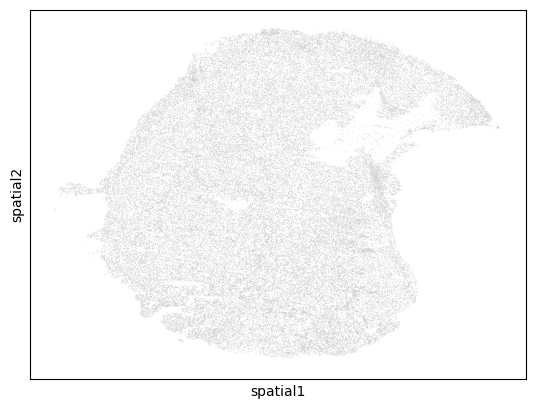

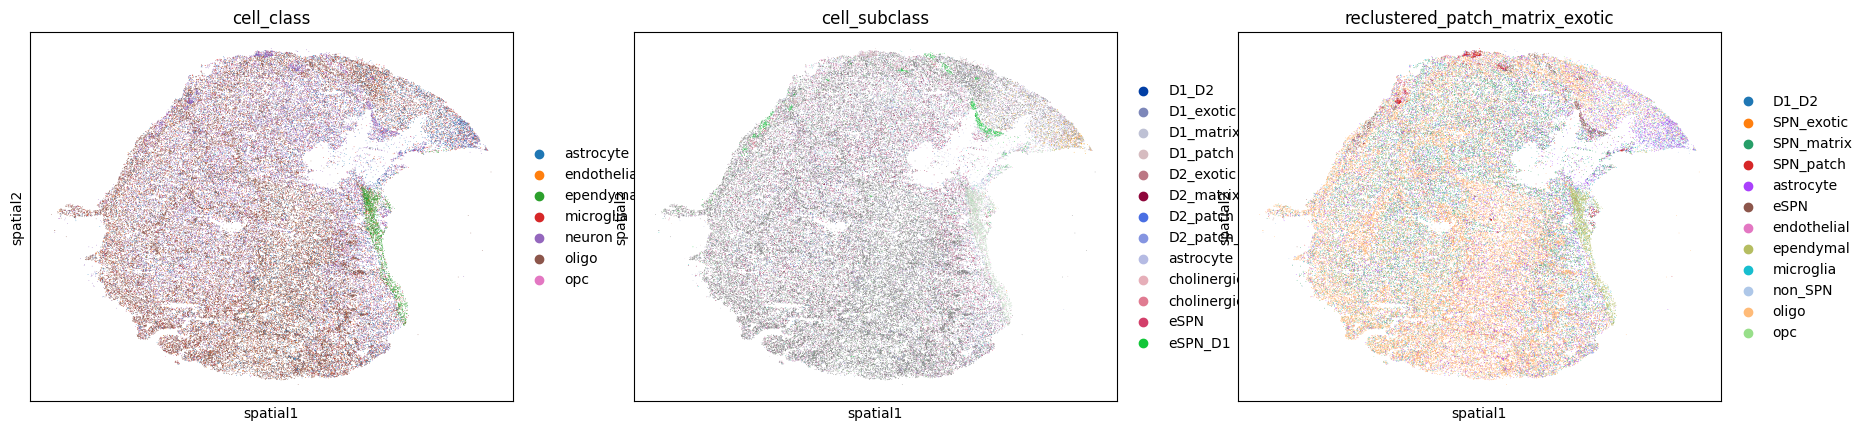

In [6]:
# Add spatila data
adata.obs["has_spatial"] = (~adata.obs.x.isna()) & (~adata.obs.x.isna())
adata.obsm["spatial"] = adata.obs[["x","y"]].values

sc.pl.embedding(adata, basis="spatial")#, color="nCount_RNA")
sc.pl.embedding(adata, basis="spatial", color=["cell_class", "cell_subclass", "reclustered_patch_matrix_exotic"])

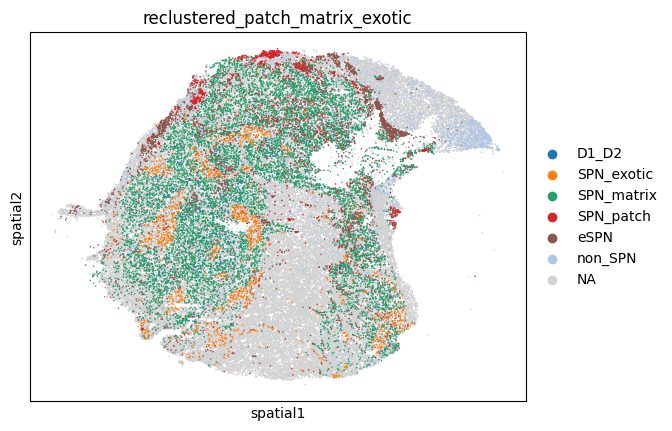

In [7]:
sc.pl.embedding(adata, basis="spatial", color=["reclustered_patch_matrix_exotic"], 
                groups=["D1_D2", "SPN_exotic", "SPN_matrix", "SPN_patch", "eSPN", "non_SPN"],size=5)

In [ ]:
# Save raw counts
adata.layers["counts"] = adata.X.copy()

# add faje pct_intronic
adata.obs["pct_intronic"] = 1 # all good
adata.obs["is_cell"] = True

In [9]:
adata.write('/home/gdallagl/myworkdir/XDP/data/XDP/diseased/recon_241105/FAKE_BCL/FAKE_LIBRARY/adata/raw_adata.h5ad')